In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import finite_diff_mode_solver as f

# Initialize all needed parameters

In [2]:
grid_size = 100
# 430 grid points provide smooth results
number_points = 300
h = grid_size / (number_points - 1)
lam = 0.78
k0 = 2 * np.pi / lam
e_substrate = 1.5 ** 2
delta_e = 1.5e-2
w = 15.0

x = np.linspace(-grid_size / 2, grid_size / 2, number_points)
# permittivities
prm = e_substrate + delta_e * np.exp(- (x / w) ** 2)

# Calculate 1D Modes

In [3]:
a = timer()
eff_eps_sp, vecs_sp = f.guided_modes_1DTE(prm, k0, h, dtype_mat=np.float32)
b = timer()
print("Time elapsed single precision {:.5f}s".format(b - a))

a = timer()
eff_eps_dp, vecs_dp = f.guided_modes_1DTE(prm, k0, h)
b = timer()
print("Time elapsed double precision {:.5f}s".format(b - a))

Time elapsed single precision 0.20916s
Time elapsed double precision 0.12676s


# Final Plots

Text(0, 0.5, 'Normalized Electrical field strength')

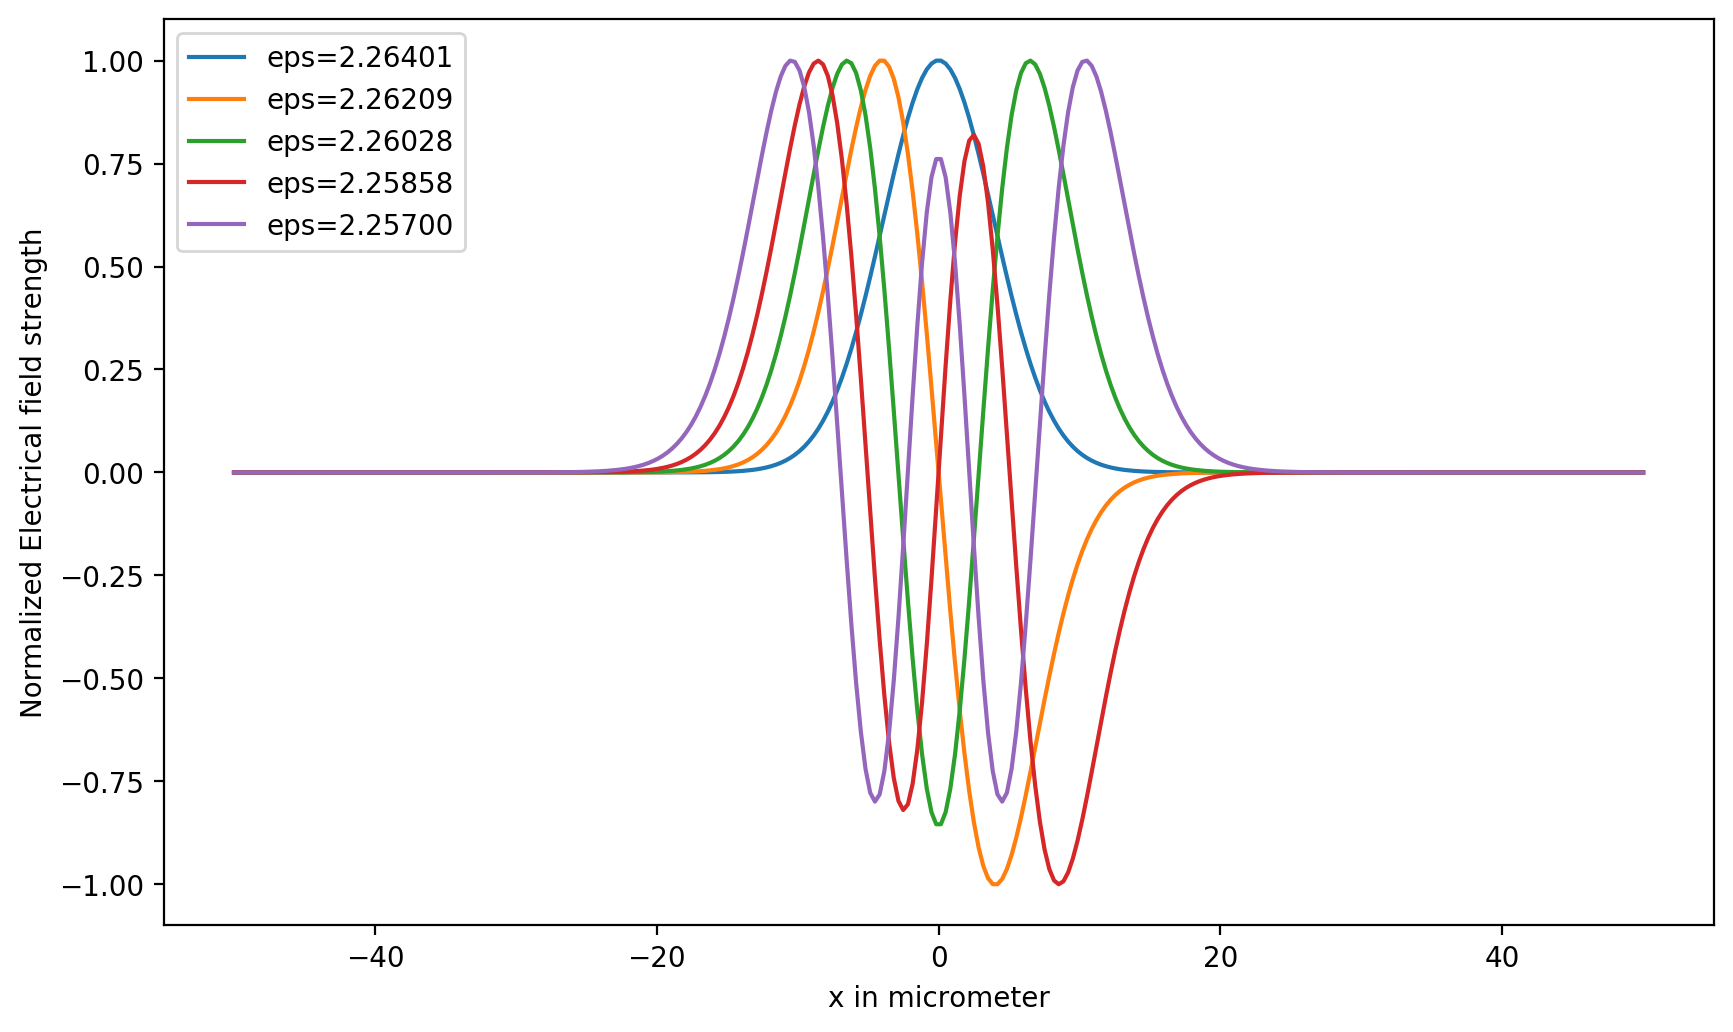

In [4]:
fig=plt.figure(figsize=(10, 6), dpi=200, facecolor='w', edgecolor='k')
num_modes = 5
for eps, v in zip(eff_eps_dp[0:num_modes], vecs_dp[0:num_modes]):
    plt.plot(x, v, label="eps={:.5f}".format(eps))
plt.legend(loc="upper left") 
plt.xlabel("x in micrometer")
plt.ylabel("Normalized Electrical field strength")

# Initialization of Task II

In [5]:
grid_size_x = 100 
grid_size_y = 100
# 300 grid points provide smooth results
num_x = 300
num_y = 300
extent = (-grid_size_x / 2, grid_size_x / 2, - grid_size_y / 2, grid_size_y / 2    )

h = grid_size_x / (num_x - 1)
lam = 0.78
k0 = 2 * np.pi / lam
e_substrate = 1.5 ** 2
delta_e = 1.5e-2
w = 15.0

x = np.linspace(-grid_size_x / 2, grid_size_x / 2, num_x)
y = np.linspace(-grid_size_y / 2, grid_size_y / 2, num_y)
x, y = np.meshgrid(x, y)
prm = e_substrate + delta_e * np.exp(- (x **2 + y**2) / w ** 2)

# Calculate 2D Modes

In [6]:
num_modes = 6

a = timer()
eff_eps2d_sp, vecs2d_sp = f.guided_modes_2D(prm, k0, h, num_modes, dtype_mat=np.float32)
b = timer()
print("Time elapsed single precision \t {:.5f}s".format(b - a))


a = timer()
eff_eps2d_dp, vecs2d_dp = f.guided_modes_2D(prm, k0, h, num_modes)
b = timer()
print("Time elapsed double precision \t{:.5f}s".format(b - a))

Time elapsed single precision 	 1.44961s
Time elapsed double precision 	3.56081s


# Final 2D Images

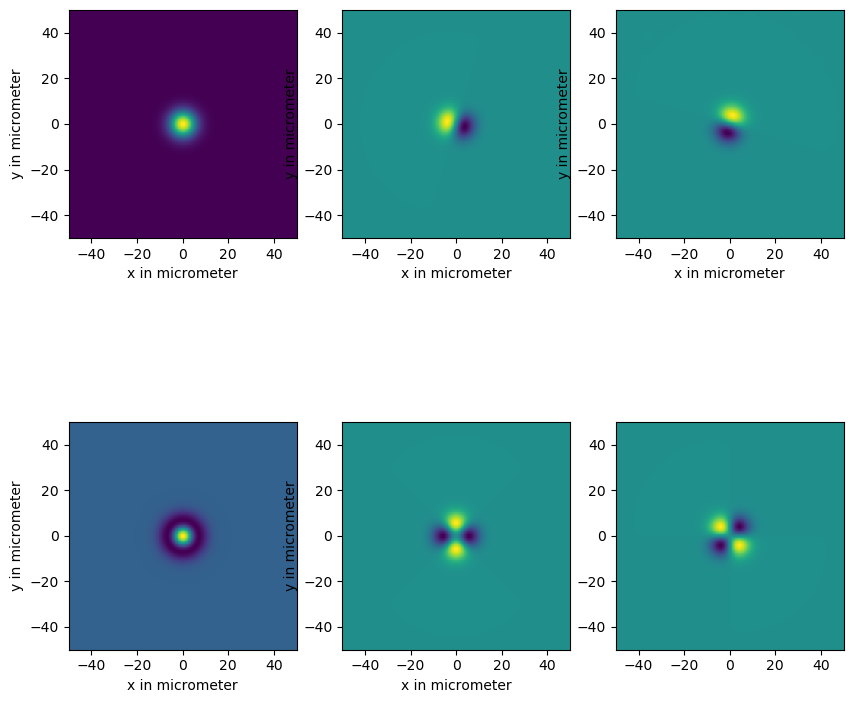

In [7]:
extent = (-grid_size_x / 2, grid_size_x / 2, - grid_size_y / 2, grid_size_y / 2    )
fig=plt.figure(figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
for i in range(num_modes):
    plt.xlabel("x in micrometer")
    plt.ylabel("y in micrometer")
    plt.subplot(num_modes / 3, 3, i + 1)
    plt.imshow(vecs2d_dp[i], extent=extent)

# Single vs Double Precision

1D 0th order: Average of relative error between single and double precision: 1.4907418099209315e-05

2D 0th order: Average of relative error between single and double precision: 9.742700692543032e-06

np.float32 machine precision is: 1.1920928955078125e-07


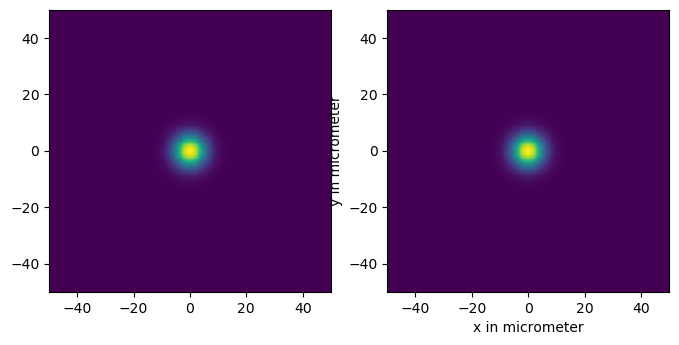

In [8]:
fig=plt.figure(figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.imshow(vecs2d_dp[0], extent=extent)
plt.subplot(1, 2, 2)
plt.imshow(vecs2d_sp[0], extent=extent)
plt.xlabel("x in micrometer")
plt.ylabel("y in micrometer")

print("1D 0th order: Average of relative error between single and double precision: {}\n"\
      .format(np.mean(abs(vecs_dp[0] - vecs_sp[0]))))
print("2D 0th order: Average of relative error between single and double precision: {}\n"\
      .format(np.mean(abs(vecs2d_dp[0] - vecs2d_sp[0]))))
print("np.float32 machine precision is: {}".format(np.finfo(np.float32).eps))

# Check wether 1D and 2D are in accordance

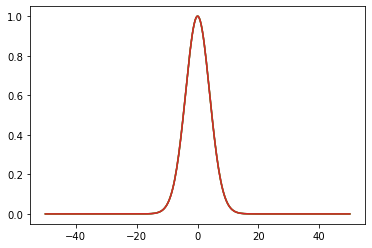

In [9]:
plt.plot(x[0], vecs2d_dp[0][num_y // 2, :])
plt.plot(x[0], vecs2d_sp[0][num_y // 2, :])
plt.plot(x[0], vecs_sp[0])
plt.plot(x[0], vecs_dp[0])

# Extra: 2D Code works also for non-rectangular Grids

In [10]:
grid_size_x = 100 
grid_size_y = 50
num_x = 300
num_y = 150
extent = (-grid_size_x / 2, grid_size_x / 2, - grid_size_y / 2, grid_size_y / 2)

h = grid_size_x / (num_x - 1)
lam = 0.78
k0 = 2 * np.pi / lam
e_substrate = 1.5 ** 2
delta_e = 1.5e-2
w = 15.0

x = np.linspace(-grid_size_x / 2, grid_size_x / 2, num_x)
y = np.linspace(-grid_size_y / 2, grid_size_y / 2, num_y)
x, y = np.meshgrid(x, y)
prm = e_substrate + delta_e * np.exp(- (x **2 + y**2) / w ** 2)

In [11]:
num_modes = 6

a = timer()
eff_eps2d_sp, vecs2d_sp = f.guided_modes_2D(prm, k0, h, num_modes, dtype_mat=np.float32)
b = timer()
print("Time elapsed single precision \t {:.5f}s".format(b - a))

Time elapsed single precision 	 0.38701s


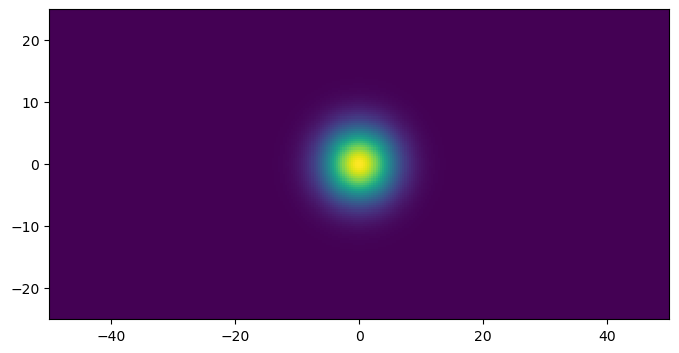

In [12]:
fig=plt.figure(figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(vecs2d_sp[0], extent=extent)